In [95]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score,f1_score,confusion_matrix

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
svm_classifier=SVC(kernel='linear')
svm_classifier.fit(x_train,y_train)
y_pred=svm_classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,average='weighted')
F1SCORE=f1_score(y_test,y_pred,average='weighted')
cm0=confusion_matrix(y_test,y_pred)

In [98]:
print(f'Accuracy:{accuracy*100:.2f}%')
print(f'Recall:{recall*100:.2f}%')
print(f'F1Score:{F1SCORE*100:.2f}%')

Accuracy:100.00%
Recall:100.00%
F1Score:100.00%


In [99]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [100]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [101]:
cm0

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [102]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups(subset='all')

In [103]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [104]:
data.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n=================   ==========\nClasses                     20\nSamples total            18846\nDime

In [105]:
data.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [106]:
data.target[0]

10

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer=CountVectorizer(stop_words='english')
x=vectorizer.fit_transform(data.data)

In [108]:
feature_names=vectorizer.get_feature_names_out()
print(feature_names[:100:1])

['00' '000' '0000' '00000' '000000' '00000000' '0000000004' '0000000005'
 '00000000b' '00000001' '00000001b' '0000000667' '00000010' '00000010b'
 '00000011' '00000011b' '0000001200' '00000074' '00000093' '000000e5'
 '00000100' '00000100b' '00000101' '00000101b' '00000110' '00000110b'
 '00000111' '00000111b' '000003' '00000315' '000005102000'
 '00000510200001' '000007' '00000ee5' '00000f' '00001000' '00001000b'
 '00001001' '00001001b' '00001010' '00001010b' '00001011' '00001011b'
 '000010af' '00001100' '00001100b' '00001101' '00001101b' '00001110'
 '00001110b' '00001111' '00001111b' '000020' '000021' '000042' '000050'
 '000062david42' '000094' '0000ahc' '0000vec' '0001' '00010000'
 '00010000b' '00010001' '00010001b' '00010010' '00010010b' '00010011'
 '00010011b' '000100255pixel' '00010100' '00010100b' '00010101'
 '00010101b' '00010110' '00010110b' '00010111' '00010111b' '00011000'
 '00011000b' '00011001' '00011001b' '00011010' '00011010b' '00011011'
 '00011011b' '00011100' '00011100b' '

In [109]:
print("Shape of the feature matrix:",x.shape)

Shape of the feature matrix: (18846, 173451)


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidfx=tfidf_vectorizer.fit_transform(data.data)

In [111]:
print(tfidfx.shape)

(18846, 173451)


In [112]:
tfidf_feature_name=tfidf_vectorizer.get_feature_names_out()
print(tfidf_feature_name[:100:1])

['00' '000' '0000' '00000' '000000' '00000000' '0000000004' '0000000005'
 '00000000b' '00000001' '00000001b' '0000000667' '00000010' '00000010b'
 '00000011' '00000011b' '0000001200' '00000074' '00000093' '000000e5'
 '00000100' '00000100b' '00000101' '00000101b' '00000110' '00000110b'
 '00000111' '00000111b' '000003' '00000315' '000005102000'
 '00000510200001' '000007' '00000ee5' '00000f' '00001000' '00001000b'
 '00001001' '00001001b' '00001010' '00001010b' '00001011' '00001011b'
 '000010af' '00001100' '00001100b' '00001101' '00001101b' '00001110'
 '00001110b' '00001111' '00001111b' '000020' '000021' '000042' '000050'
 '000062david42' '000094' '0000ahc' '0000vec' '0001' '00010000'
 '00010000b' '00010001' '00010001b' '00010010' '00010010b' '00010011'
 '00010011b' '000100255pixel' '00010100' '00010100b' '00010101'
 '00010101b' '00010110' '00010110b' '00010111' '00010111b' '00011000'
 '00011000b' '00011001' '00011001b' '00011010' '00011010b' '00011011'
 '00011011b' '00011100' '00011100b' '

In [113]:
print(x[:5,:])

  (0, 106272)	1
  (0, 63540)	1
  (0, 132912)	1
  (0, 112803)	1
  (0, 39347)	2
  (0, 55690)	2
  (0, 68433)	2
  (0, 148238)	1
  (0, 124352)	6
  (0, 73447)	2
  (0, 133362)	1
  (0, 121002)	1
  (0, 127249)	1
  (0, 119726)	1
  (0, 52205)	1
  (0, 108611)	1
  (0, 125894)	1
  (0, 122635)	1
  (0, 102005)	1
  (0, 4705)	1
  (0, 117328)	1
  (0, 127281)	1
  (0, 86193)	1
  (0, 126650)	1
  (0, 149139)	1
  :	:
  (4, 120937)	1
  (4, 78107)	1
  (4, 56656)	1
  (4, 90122)	2
  (4, 128622)	1
  (4, 141248)	1
  (4, 76066)	1
  (4, 11582)	1
  (4, 48961)	1
  (4, 88356)	1
  (4, 166281)	1
  (4, 39290)	1
  (4, 159550)	2
  (4, 76594)	1
  (4, 155342)	1
  (4, 47664)	1
  (4, 6332)	1
  (4, 150996)	1
  (4, 151486)	1
  (4, 108302)	1
  (4, 71080)	1
  (4, 131520)	1
  (4, 44891)	1
  (4, 37013)	1
  (4, 40351)	1


In [114]:
y=data.target

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()
nb_classifier.fit(x_train,y_train)
y_pred=nb_classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,average='weighted')
F1SCORE=f1_score(y_test,y_pred,average='weighted')

In [117]:
print(f'Accuracy:{accuracy*100:.2f}%')
print(f'Recall:{recall*100:.2f}%')
print(f'F1Score:{F1SCORE*100:.2f}%')

Accuracy:87.43%
Recall:87.43%
F1Score:86.92%


In [118]:
cm=confusion_matrix(y_test,y_pred)

In [123]:
cm

array([[138,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   1,   4,   1,   0,   3,   3],
       [  0, 187,   0,   4,   0,   3,   0,   0,   1,   0,   0,   2,   0,
          1,   1,   1,   0,   2,   0,   0],
       [  0,  36,  73,  44,   6,  25,   0,   3,   0,   0,   0,   3,   3,
          0,   0,   0,   0,   0,   2,   0],
       [  0,  11,   0, 157,   8,   1,   0,   1,   0,   0,   1,   1,   0,
          1,   1,   0,   0,   0,   1,   0],
       [  0,   2,   0,   9, 184,   1,   2,   0,   0,   0,   0,   2,   2,
          0,   2,   0,   0,   0,   1,   0],
       [  0,  21,   0,   6,   2, 182,   0,   0,   0,   1,   0,   0,   0,
          1,   2,   0,   0,   0,   0,   0],
       [  0,   5,   0,  24,   5,   0, 134,   9,   1,   1,   3,   0,   4,
          1,   1,   0,   2,   1,   2,   0],
       [  0,   1,   0,   0,   0,   0,   2, 186,   2,   0,   0,   0,   2,
          1,   0,   0,   1,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   4,   2, 158,   0,   0,  

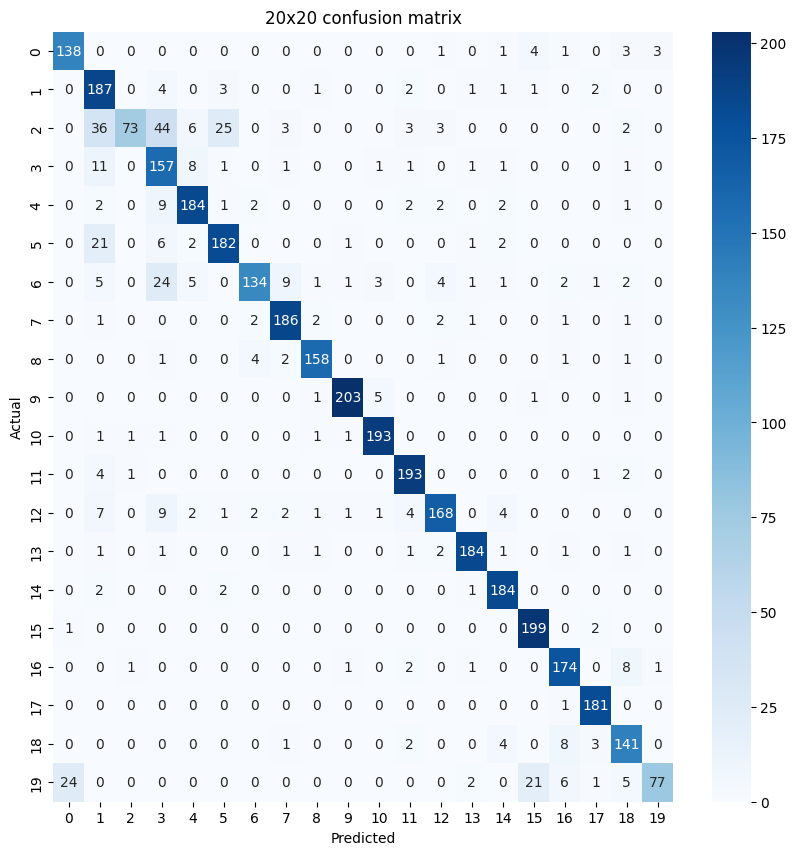

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=np.arange(20),yticklabels=np.arange(20))
plt.title("20x20 confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [131]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
x=iris.data
y=iris.target

In [132]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x)
labels=kmeans.labels_
print("Cluster centers:",kmeans.cluster_centers_)

Cluster centers: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


C:\Users\17100\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


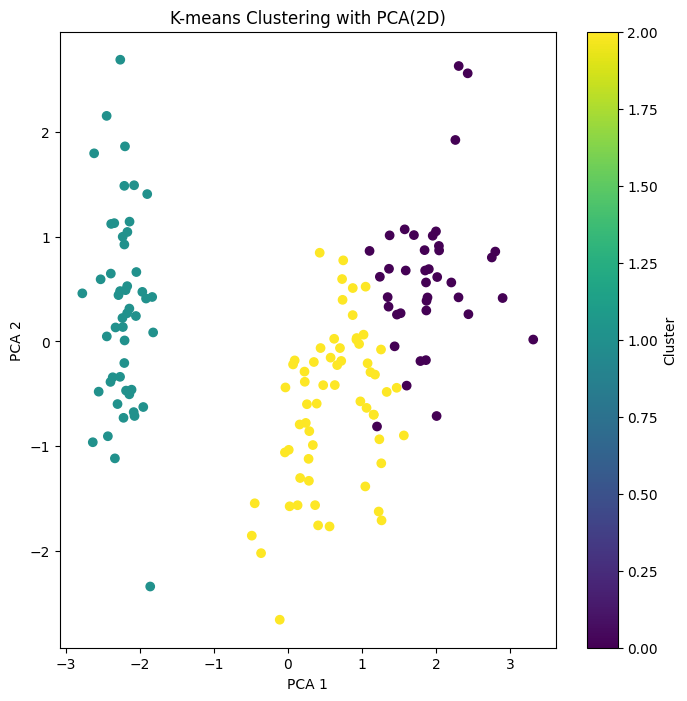

In [133]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='viridis')
plt.title('K-means Clustering with PCA(2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\17100\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


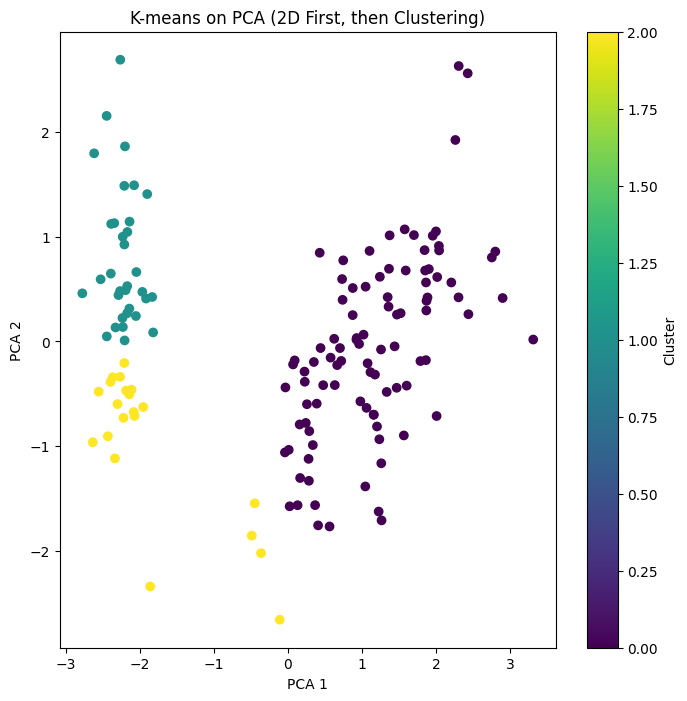

In [140]:
# 先降维到2维
X_pca = PCA(n_components=2).fit_transform(x_scaled)

# K-means聚类
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

# 可视化聚类结果
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title('K-means on PCA (2D First, then Clustering)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [141]:
silhouette=silhouette_score(x_scaled,labels)
print(f"Silhouette Score after K-means:{silhouette:.3f}")


Silhouette Score after K-means:0.447


C:\Users\17100\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\17100\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\17100\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\17100\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

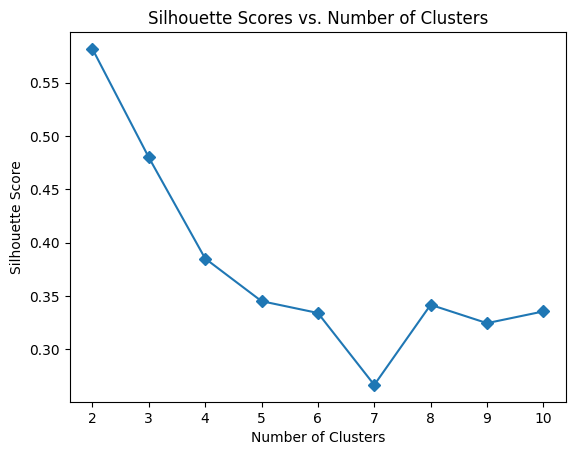

In [144]:
silhouette_scores=[]
cluster_range=range(2,11)
for i in cluster_range:
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x_scaled)
    silhouette_scores.append(silhouette_score(x_scaled,kmeans.labels_))
plt.plot(cluster_range,silhouette_scores,marker='D')
plt.title("Silhouette Scores vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()
    